# Are Germans the best team at penalty shootouts?

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df = pd.read_pickle('Penalty_Results.pkl')
df.head()

,Datetime,Home Team Name,Away Team Name,Home_pen_score,Away_pen_score,Winner
0,1982-07-08,Germany,France,5,4,Germany
1,1986-06-21,Brazil,France,3,4,France
2,1986-06-21,Germany,Mexico,4,1,Germany
3,1986-06-22,Spain,Belgium,4,5,Belgium
4,1990-06-25,Republic of Ireland,Romania,5,4,Republic of Ireland


In [15]:
teams = list(df['Winner'].unique())
num_matches = []
num_wins = []
gs = []
gc = []

for x in teams:
    g1 = 0
    gc1 = 0
    
    tmp = df[df['Home Team Name'] == x]
    num1 = tmp.shape[0]
    
    for y in tmp['Home_pen_score'].iteritems():
        g1 += y[1]
        
    for y in tmp['Away_pen_score'].iteritems():
        gc1 += y[1]
    
    tmp = df[df['Away Team Name'] == x]
    num2 = tmp.shape[0]
    
    for y in tmp['Away_pen_score'].iteritems():
        g1 += y[1]
        
    for y in tmp['Home_pen_score'].iteritems():
        gc1 += y[1]

    tmp = df[df['Winner'] == x]
    num3 = tmp.shape[0]
    
    num_matches.append(num1+num2)
    num_wins.append(num3)
    gs.append(g1)
    gc.append(gc1)

In [21]:
len(num_wins)

17

In [51]:
p_agg = pd.DataFrame({
    'Name' : teams,
    'Number_of_matches' : num_matches,
    'Number_of_wins': num_wins,
    'Goals_scored' : gs,
    'Goals_conceded' : gc
})
p_agg['Win_percentage'] = p_agg['Number_of_wins'] / p_agg['Number_of_matches']
p_agg['gs_pm'] = p_agg['Goals_scored'] / p_agg['Number_of_matches']
p_agg['gc_pm'] = p_agg['Goals_conceded'] / p_agg['Number_of_matches']
p_agg['gd'] = p_agg['gs_pm'] - p_agg['gc_pm']
p_agg

,Name,Number_of_matches,Number_of_wins,Goals_scored,Goals_conceded,Win_percentage,gs_pm,gc_pm,gd
0,Germany,4,4,17,10,1.000000,4.250000,2.500000,1.750000
1,France,4,2,15,16,0.500000,3.750000,4.000000,-0.250000
2,Belgium,1,1,5,4,1.000000,5.000000,4.000000,1.000000
3,Republic of Ireland,2,1,7,7,0.500000,3.500000,3.500000,0.000000
4,Argentina,5,4,17,14,0.800000,3.400000,2.800000,0.600000
5,Bulgaria,1,1,3,1,1.000000,3.000000,1.000000,2.000000
6,Sweden,1,1,5,4,1.000000,5.000000,4.000000,1.000000
7,Brazil,4,3,13,10,0.750000,3.250000,2.500000,0.750000
8,Spain,3,1,10,12,0.333333,3.333333,4.000000,-0.666667
9,Korea Republic,1,1,5,3,1.000000,5.000000,3.000000,2.000000


### Most wins in penalty shootouts

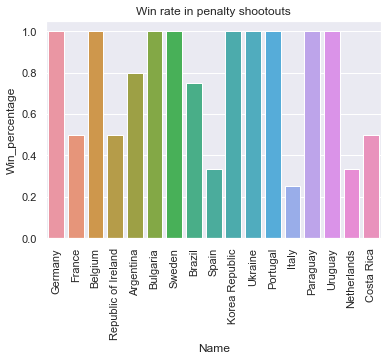

In [52]:

w_plt = sns.barplot(x='Name',y='Win_percentage',data=p_agg)
w_plt.set_title("Win rate in penalty shootouts")
_ = plt.xticks(rotation=90)

### Most goals scored/ conceded per match

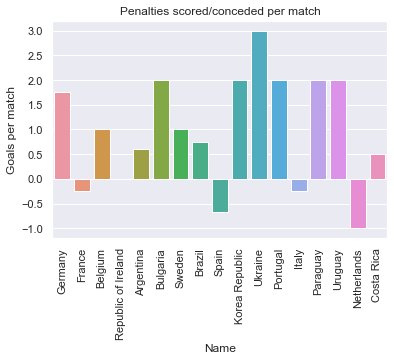

In [50]:
gsc_plt = sns.barplot('Name','gd',data=p_agg)
_ = plt.xticks(rotation=90)
gsc_plt.set_title("Penalties scored/conceded per match")
_ = gsc_plt.set_ylabel("Goals per match")

### Number of shootouts played

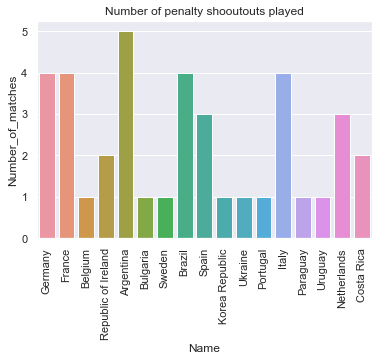

In [49]:
num_plt = sns.barplot('Name','Number_of_matches',data=p_agg)
_= plt.xticks(rotation=90)
_ = num_plt.set_title("Number of penalty shooutouts played")

### win rate for teams with more than 2 penalty shootouts

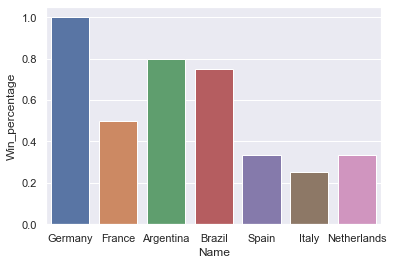

In [53]:
tmp = p_agg[p_agg['Number_of_matches'] > 2]
wr_plt = sns.barplot('Name','Win_percentage',data=tmp)